**Libraries**

In [1]:
!pip install Augmentor
!pip install tensorflow_addons
import os
from os import path
import random
import numpy as np
import pandas as pd
import cv2
import Augmentor
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers ,Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,SeparableConv2D, MaxPooling2D,MaxPool2D, Dense,Add, Flatten,GlobalAvgPool2D
from tensorflow.keras.layers import Dropout,GlobalAveragePooling2D,BatchNormalization, Input
from tensorflow.keras.layers import ReLU,DepthwiseConv2D ,AvgPool2D,concatenate ,ReLU
from keras.preprocessing import image
from tensorflow_addons.optimizers import CyclicalLearningRate
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

**Preprocessing of Dataset**

In [2]:
# Read All training dataset folders from its directory

All_Dataset=tf.keras.utils.image_dataset_from_directory("/kaggle/input/drowsydataset/Final_Drowsy_Dataset/Train",
    label_mode='categorical',
    color_mode='rgb',
    batch_size=20,
    image_size=(224, 224)
)

Found 18012 files belonging to 4 classes.


In [3]:
print(len(All_Dataset))

901


**Print Samples of data**

/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


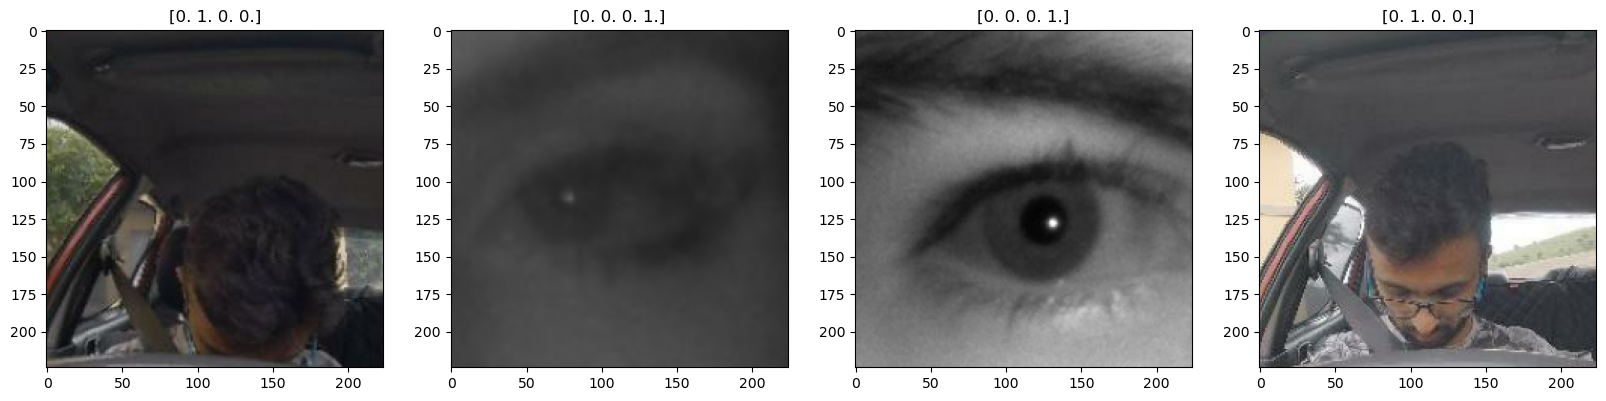

In [4]:
# visualize some images with its class

data_iterator = All_Dataset.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# scaling the images
All_Dataset = All_Dataset.map(lambda x,y: (x/255, y))

**Split Data into train and validation**

In [5]:
#Split data into 70% for Train and 30% for test

Train_Datasize=631
Validaition_Datasize=270

Training_Data = All_Dataset.take(Train_Datasize)
Val_Data = All_Dataset.skip(Train_Datasize).take(Validaition_Datasize)

In [6]:
print(len(Training_Data))

631


**Mobile Net**

In [7]:
model = tf.keras.applications.mobilenet.MobileNet()
#Architecture of Mobile Net
my_input = model.layers[0].input
my_output = model.layers[-4].output
flattened_layer = layers.Flatten()(my_output)
final_out = layers.Dense(4)(flattened_layer)
final_output = layers.Activation('softmax')(final_out)

17225924/17225924 [==============================] - 0s 0us/step


**Compilation of Model**

In [8]:
New_model = keras.Model(inputs = my_input, outputs = final_output)
New_model.summary()

New_model.compile(loss="categorical_crossentropy",optimizer = "adam" , metrics = ["accuracy"] )

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

**Fitting Mobile Net**

In [9]:
New_model.fit( Training_Data, validation_data = Val_Data,epochs = 3,batch_size=20)

Epoch 1/3


2023-07-05 23:10:15.062596: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


631/631 [==============================] - 153s 203ms/step - loss: 0.0689 - accuracy: 0.9810 - val_loss: 0.0558 - val_accuracy: 0.9861
Epoch 2/3
631/631 [==============================] - 100s 158ms/step - loss: 0.0346 - accuracy: 0.9896 - val_loss: 0.0087 - val_accuracy: 0.9980
Epoch 3/3
631/631 [==============================] - 101s 159ms/step - loss: 0.0195 - accuracy: 0.9947 - val_loss: 0.0352 - val_accuracy: 0.9933


**Visualization**

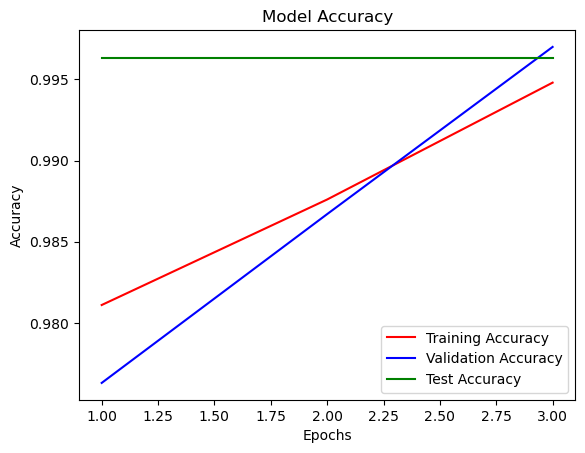

In [10]:
import matplotlib.pyplot as plt

# Generate data for the plot
train_accuracy = [0.9811, 0.9876, 0.9948 ]
validation_accuracy = [ 0.9763,  0.9867 , 0.9970]
test_accuracy = [0.9963, 0.9963 , 0.9963]
epochs = [1, 2 ,3]

# Plot the data
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, test_accuracy, 'g', label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Saving Mobile Net Model**

In [11]:
#Saving model
New_model.save('Mobile_Net_Model.h5')

**Reading TestData**

In [12]:
# Read All Testing dataset folders from its directory
Testing_Dataset=tf.keras.utils.image_dataset_from_directory("/kaggle/input/drowsydataset/Final_Drowsy_Dataset/Test",
    label_mode='categorical',
    color_mode='rgb',
    batch_size=20,
    image_size=(224, 224)
)

Found 4600 files belonging to 4 classes.


In [13]:
print(len(Testing_Dataset))

230


**Display Sample of Testing Data**

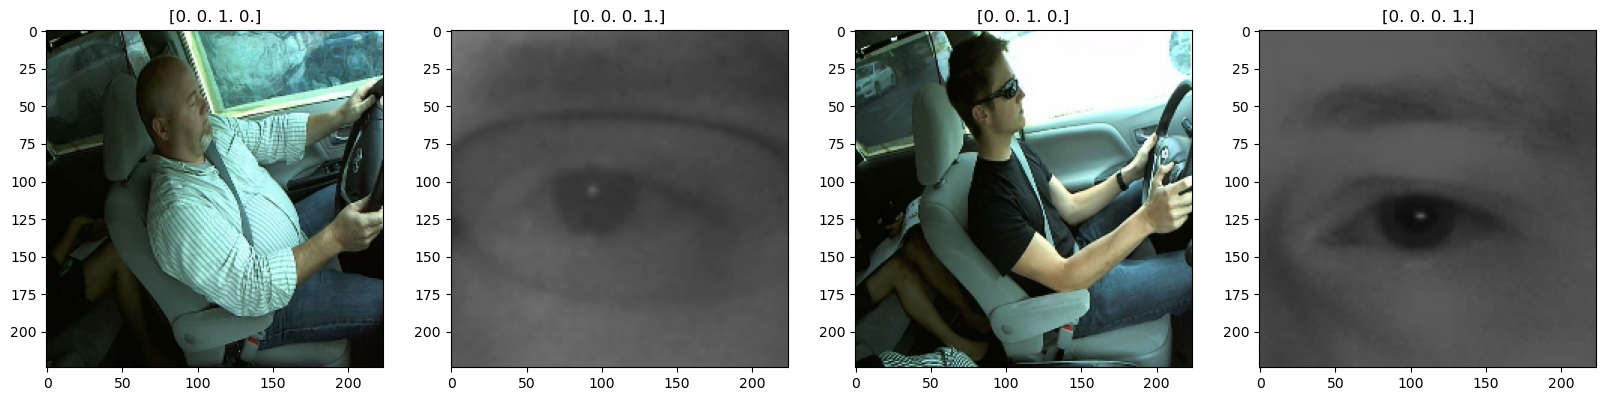

In [14]:
# visualize some images with its class
data_iterator = Testing_Dataset.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# scaling the images
Testing_Dataset = Testing_Dataset.map(lambda x,y: (x/255, y))

**Evaluating MobileNet model**

In [15]:
New_model.evaluate(Testing_Dataset)

230/230 [==============================] - 33s 141ms/step - loss: 0.1326 - accuracy: 0.9687


[0.13261230289936066, 0.9686956405639648]

**Test Script**

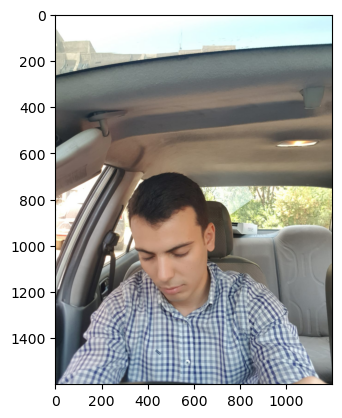

In [21]:
# Read image
img1= cv2.imread('/kaggle/input/test-file/test_Last_Model/Drowsy (2).jpeg')
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

**Reshape image**

In [22]:
final_image =cv2.resize(img1,(224,224))
final_image=np.expand_dims(final_image,axis =0)##need fourth dimension
final_image=final_image/255.0

In [24]:
#test script & #assigning to the class after prediction (MobileNet)
max_prop=np.argmax(New_model.predict(final_image),axis=1)


1/1 [==============================] - 0s 23ms/step


In [25]:
Output_Class = ["Closed eye","Drowsy","Not Drowsy","Open eye"]
x = int(max_prop)
print(Output_Class[x])

Drowsy


**Detect eye usinng haarcascade**

In [28]:
img= cv2.imread('/kaggle/input/test-file/test_Last_Model/ClosedEye9.jpg')


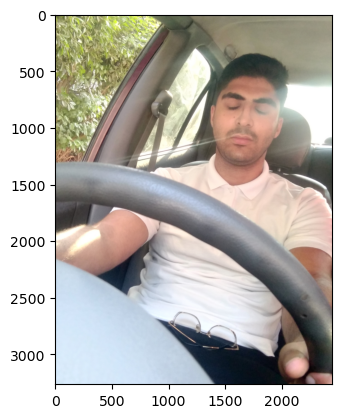

In [29]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [31]:
faceCascade =cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

In [32]:
eye_cascade =cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_righteye_2splits.xml')

In [33]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [35]:
eyes =eye_cascade.detectMultiScale(gray,1.1,4)

In [40]:
for(x, y, w, h)in eyes:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)


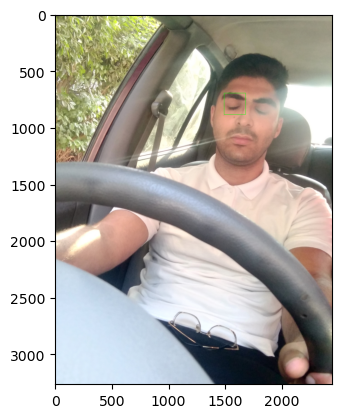

In [42]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

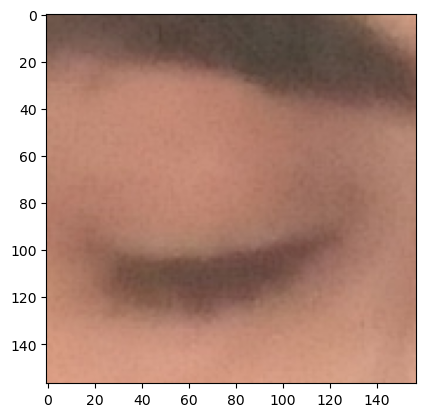

In [44]:
eye_cascade= cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_righteye_2splits.xml')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#print(facecascade.empty())
eyes =eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray= gray[y:y+h,x:x+w]
    roi_color= img[y:y+h,x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("eyes are not detected")
    else:
        for(ex,ey,ew,eh)in eyess:
             eyes_roi =roi_color[ey: ey+eh, ex:ex + ew]
    plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))
                               
 
             
    

In [46]:
eyes_roi.shape

(157, 157, 3)

In [47]:
# Resize Eyes
eyeDetection =cv2.resize(eyes_roi,(224,224))
eyeDetection=np.expand_dims(eyeDetection,axis =0)##need fourth dimension
eyeDetection=eyeDetection/255.0

In [49]:
Output_Class = ["Closed eye","Drowsy","Not Drowsy","Open eye"]
x = int(max_prop)
print(Output_Class[x])

Closed eye
